In [183]:
#%%imports
using CSV
using DataFrames
using Glob
using NaNStatistics
using Plots
using Random
using Revise

include(joinpath(@__DIR__, "../src/LVisP.jl"))
using .LVisP


In [184]:
#%%data loading
fnames = Glob.glob("*.csv", joinpath(@__DIR__,"../data/"))
println(fnames)
fname = fnames[13]
df = DataFrame(CSV.File(fname))

df_raw = subset(df, :processing => p -> p .== "raw")    #raw
df_pro = subset(df, :processing => p -> p .!= "raw")    #processed

theta_raw = sort(unique(df_raw[!,1]))
x_raw = map(x -> Vector(x[!,2]), collect(groupby(df_raw, 1; sort=true)))
y_raw = map(y -> Vector(y[!,3]), collect(groupby(df_raw, 1; sort=true)))
theta_pro = sort(unique(df_pro[!,1]))
x_pro = map(x -> Vector(x[!,2]), collect(groupby(df_pro, 1; sort=true)))
y_pro = map(y -> Vector(y[!,3]), collect(groupby(df_pro, 1; sort=true)))


["/home/lukas/github/LVisP/src_jl_demo/../data/11370314_snib_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/114645810_snibc_elasticc.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/11500415_sniin_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/120712717_snibc_elasticc.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/122276966_snibc_elasticc.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/124266324_snii_elasticc.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/132358631_snii_elasticc.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/13686088_snia_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/15108182_snic_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/18213902_sniip_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/1853138_sniil2_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/21794560_snib_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/21951066_sniil2_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/22502

4-element Vector{Vector{Float64}}:
 [32.508016215646045, 33.99031474705124, 35.569813925264626, 37.29616231449743, 39.219608436688254, 41.39141647333322, 43.83523715175326, 46.47971047088342, 49.23435528097082, 52.008730840986175  …  21.941245274133784, 22.269115725443623, 22.57625026553566, 22.85653878794216, 23.10315962342594, 23.3085116676601, 23.46414011366238, 23.56065527049476, 23.587643904593158, 23.533572491363437]
 [68.69498937251261, 69.63979559147911, 70.81512434851916, 72.56934880955981, 75.14326135265433, 78.44903605303493, 82.3403902995637, 86.67403952408684, 91.30871509141559, 96.1039262088743  …  34.04977220824618, 34.67018664616781, 35.35361753470168, 36.07360781447085, 36.80355975563073, 37.51655267547116, 38.18515842961962, 38.78125375588386, 39.27582853458409, 39.63878901001529]
 [111.05553625275513, 117.70756639901128, 124.7547937658336, 132.2235717560285, 140.1415703183942, 148.5378757307501, 157.4430942489705, 166.7763104139167, 175.89334448994168, 183.9698029560

In [185]:
#%%get stats
unique_thetas = unique(theta_raw)
nthetas = length(unique_thetas)

display(unique_thetas)
display(nthetas)

4-element Vector{Int64}:
 473
 642
 784
 926

4

In [186]:
#%%get required parameters
thetalims = (minimum(theta_raw), maximum(theta_raw))
xticks = Int.(round.(collect(range(minimum(minimum.(x_raw)), maximum(maximum.(x_raw)), 5)); digits=0))
yticks = Int.(round.(collect(range(minimum(minimum.(y_raw)), maximum(maximum.(y_raw)), 5)); digits=0))

xticks = (xticks, ["x1 ", "x2 ", "x3 ", "x4 ", "x5 "])
yticks = (yticks, ["y1", "y2", "y3", "y4", "y5"])

# display(thetalims)
# display(xticks)

([14, 65, 116, 168, 219], ["y1", "y2", "y3", "y4", "y5"])

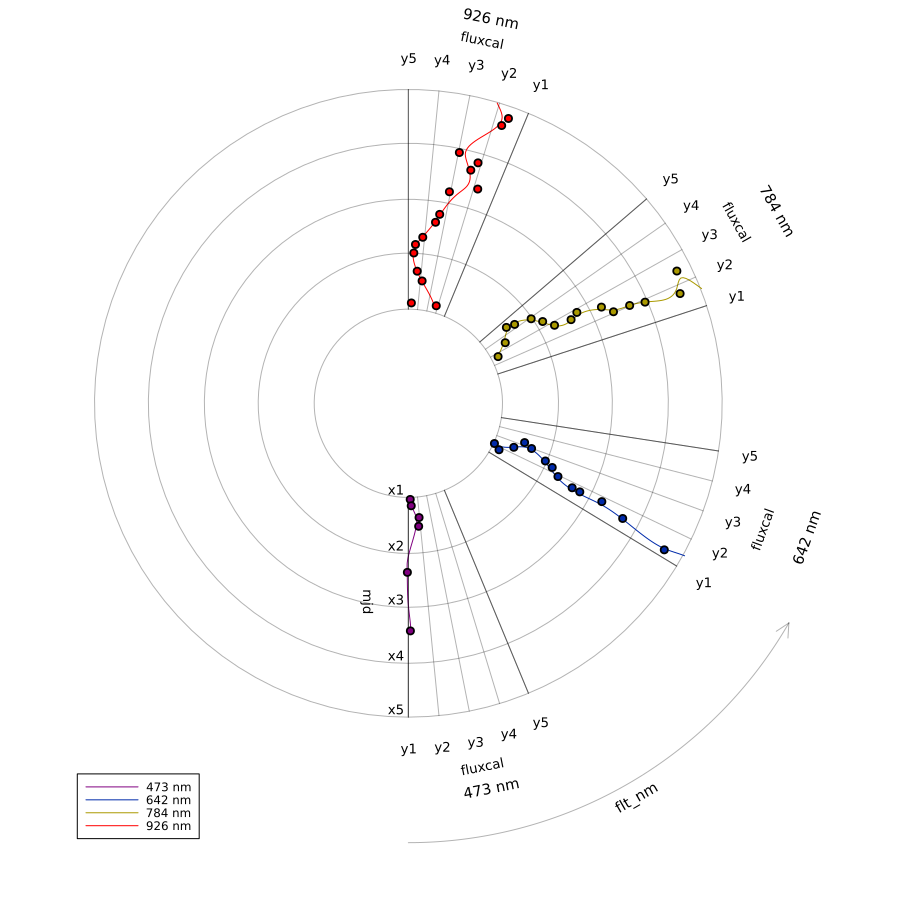

In [187]:
panelsize = pi/8

#%%plotting
LVPC = LVisP.LVisPCanvas(
    thetalims=thetalims, xticks=xticks,
    thetaguidelims=(-pi/2,3pi/2), thetaplotlims=(-pi/2+panelsize/2,pi/2-panelsize/2), xlimdeadzone=0.3, panelsize=panelsize,
    thetalabel=names(df_raw)[1], xlabel="\n$(names(df_raw)[2])" * " "^28, ylabel=names(df_raw)[3],
    th_arrowlength=pi/3,
    panelbounds=true, ygrid=true,
    fontsizes=(thetalabel=10, ylabel=9, xlabel=9, thetaticklabel=10, xticklabel=9, yticklabel=9),
    thetaarrowkwargs=(color=:black, alpha=0.3),
    thetaticklabelkwargs=(halign=:center,),
    thetalabelkwargs=(halign=:center,),
    xtickkwargs=(linecolor=:black, linealpha=0.3,),
    xticklabelkwargs=(rotation=0, halign=:right, valign=:bottom),
    xlabelkwargs=(rotation=-90, halign=:right, valign=:top),
    ygridkwargs=(linecolor=:black, linealpha=0.3, linestyle=:solid,),
    yticklabelkwargs=(rotation=0,),
    # ylabelkwargs=(rotation=0,),
    panelboundskwargs=(linecolor=:black, linealpha=0.5, linestyle=:solid,),
)
    
colors = palette(:rainbow, nthetas)

p = LVisP.plot(
    LVPC,
    theta_pro, x_pro, y_pro;
    yticks=yticks,
    thetaticklabels=["$thtl nm" for thtl in unique_thetas],
    plot_kwargs=[Dict(
        :lc=>colors[i], :label=>"$(unique_thetas[i]) nm",
        :seriestype=>:path,
    ) for i in eachindex(unique_thetas)]
)
plot!(p;
    size=(900,900),
    leftmargin=0Plots.mm, rightmargin=15Plots.mm,
    topmargin=15Plots.mm, bottommargin=0Plots.mm,
)

LVisP.plot!(
    LVPC,
    theta_raw, x_raw, y_raw;
    yticks=yticks,
    thetaticklabels=nothing,
    data_only=true,
    plot_kwargs=[
    Dict(
        :mc=>colors[i], :label=>"",
        :seriestype=>:scatter,
    ) for i in eachindex(unique_thetas)]
)

savefig(p, replace(fname, "./data/"=>"./gfx/", ".csv"=>".png"))
display(p)